### **APS 1 - MECSOL**

#### **Grupo 13**
- Felipe Lemos
- Guilherme Lunetta
- João Vitor Magalhães
- José Fernandes

**CONTEÚDO E OBJETIVOS DE APRENDIZADO**: Avaliar a troca de calor em aletas. Determinar a taxa, efetividade e eficiência.

Estamos interessados em avaliar o comportamento térmico de uma aleta tipo pino construída em Alumínio-2014 e utilizada para aumentar a troca térmica de uma superfície que se encontra a 100°𝐶 imersa em um ambiente a 25°𝐶 sem movimentação forçada de fluido. Outras informações sobre a geometria da aleta estão disponíveis na Tabela 1. 


<img src="./imagem.png" width=33% alt="zorka"></img>
<img src="./tabela.png"  width=33% alt="zorka"> </img>


#### Importando as Bibliotecas

In [34]:
import math
import numpy as np
import matplotlib.pyplot as plt

**Questão 1** - [5,0 pontos] Desenvolva um programa em Python que receba as informações necessárias para determinar cada um dos itens a seguir:
 - Ajuste o modelo e defina as condições de contorno para obter um gráfico da distribuição de temperatura (𝑇_analítica) ao longo do comprimento da aleta. Qual a temperatura na extremidade da aleta? 
 
 - Determine a taxa de transferência de calor, a eficiência e a efetividade para a geometria da aleta usada. 
 
 - Assumindo a hipótese de aleta infinita, determine a taxa de transferência de calor. Compare esse valor com o resultado obtido no item anterior. Qual deveria ser o comprimento da aleta para que a hipótese de aleta infinita forneça uma medida precisa para a perda de calor. 

#### Questão 1 - Solução

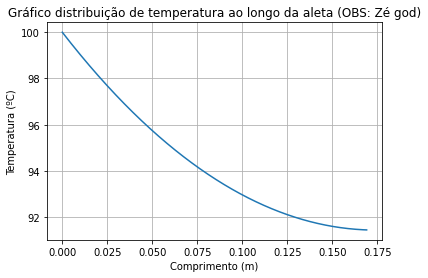

In [80]:
## Informações gerais da aleta usada

T_superficie = 100 ## ºC
T_ambiente = 25 ## ºC
raio = 12e-3 ## metros (m)
comprimento = 168e-3 ## metros (m)

h = 10 ## W/m^2*K
k = 200 ## W/mK

diametro = raio*2
perimetro = math.pi*diametro ## perimetro em metros (m) da extremidade da aleta
area = (math.pi*diametro**2)/4 ## área em metros (m) da extremidade da aleta

teta_b = T_superficie - T_ambiente
m = math.sqrt((h*perimetro)/(k*area))
cosh_mL = math.cosh(m*comprimento)
senh_mL = math.sinh(m*comprimento)
h_mk = h/(m*k)
dist_temp = (math.cosh(0) + h_mk*math.sinh(0))/(cosh_mL + h_mk*senh_mL)

T_L = dist_temp*teta_b + T_ambiente

list_x = np.arange(0, comprimento+0.001, 1e-6)
list_T = []

for x in list_x:
    dist_temp = (math.cosh(m*(comprimento - x)) + h_mk*math.sinh(m*(comprimento - x)))/(math.cosh(m*comprimento) + h_mk*math.sinh(m*comprimento))
    T = dist_temp*teta_b + T_ambiente
    list_T.append(T)

plt.plot(list_x, list_T)
plt.title("Gráfico distribuição de temperatura ao longo da aleta (OBS: Zé god)")
plt.grid()
plt.xlabel("Comprimento (m)")
plt.ylabel("Temperatura (ºC)")
plt.show()

In [81]:
print("Temperatura na extremidade da aleta: {:.2f} ºC".format(T_L))

Temperatura na extremidade da aleta: 91.45 ºC


In [82]:
## Taxa de calor

M = math.sqrt(h*perimetro*k*area)*teta_b
q = M*((senh_mL+h_mk * cosh_mL)/(cosh_mL+h_mk * senh_mL))

print("Transferência de calor: {:.2f} W".format(q))

## Efetividade

ea = q/(h*(math.pi*raio**2)*teta_b)

print("Efetividade da aleta: {:.2f}".format(ea))

## Eficiência

na = q/(h*(area + (2*raio*math.pi*comprimento))*teta_b)

print("Eficiência: {:.2f} %".format(na*100))

Transferência de calor: 9.09 W
Efetividade da aleta: 26.78
Eficiência: 92.36 %


In [83]:
## Caso de aleta infinita

print("Transferência de calor: {:.2f} W".format(M))

x = (comprimento*M)/q

print("O comprimento da aleta infinita deveria ser {:.2f} metros".format(x))

Transferência de calor: 19.59 W
O comprimento da aleta infinita deveria ser 0.36 metros


**Questão 2** - [5,0 pontos] Um longo bastão circular de alumínio tem uma de suas extremidades fixada a uma parede aquecida e transfere calor por convecção para um fluido frio. 
- Se o diâmetro do bastão fosse triplicado, qual seria a mudança na taxa de remoção de calor através do bastão? 
- Se um bastão de cobre com o mesmo diâmetro fosse usado em lugar do bastão de alumínio, qual seria a mudança na taxa de remoção de calor através do bastão? Considere: 
     $$𝑘_{cu} = 400\frac{W}{mK}$$ 
     
     $$𝑘_{al} = 240\frac{W}{mK}$$. 

#### Questão 2 - Solução

- Se o diâmetro do bastão fosse triplicado, qual seria a mudança na taxa de remoção de calor através do bastão? 

De acordo com a fórmula:
    
    
        q = q'' * A
        
A taxa de transferência de calor aumenta caso a área aumente. Como o diametro aumentou em 3 vezes, a área vai aumentar também,
portanto, a taxa vai aumentar.

In [ ]:
- Se um bastão de cobre com o mesmo diâmetro fosse usado em lugar do bastão de alumínio, qual seria a mudança na taxa de remoção de calor através do bastão? Considere: 
     $$𝑘_{cu} = 400\frac{W}{mK}$$ 
     
     $$𝑘_{al} = 240\frac{W}{mK}$$. 
        
A taxa de transferência de calor irá ter um aumento muito pequeno.